In [42]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")


In [43]:
#Load the Dataset

df = pd.read_csv("Global_Superstore2.csv", encoding="ISO-8859-1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [44]:
#Clean the Data
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Fill numeric NaNs(Not a Number) with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill object NaNs with mode
for col in df.select_dtypes(include='object'):
    df[col] = df[col].fillna(df[col].mode()[0])

# Remove duplicates
df = df.drop_duplicates()

# Convert Date column to datetime

df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce', dayfirst=True)
df = df.dropna(subset=['Order Date'])



Missing values:
 Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [45]:
# Get statistics of numeric fields
df.describe()


,Row ID,Order Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,56188.859037,246.490581,3.476545,0.142908,28.610982,26.375915
min,1.00000,2011-01-01 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,2012-06-19 00:00:00,56430.500000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,56430.500000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,14161.549620,487.565361,2.278766,0.212280,174.340972,57.296804


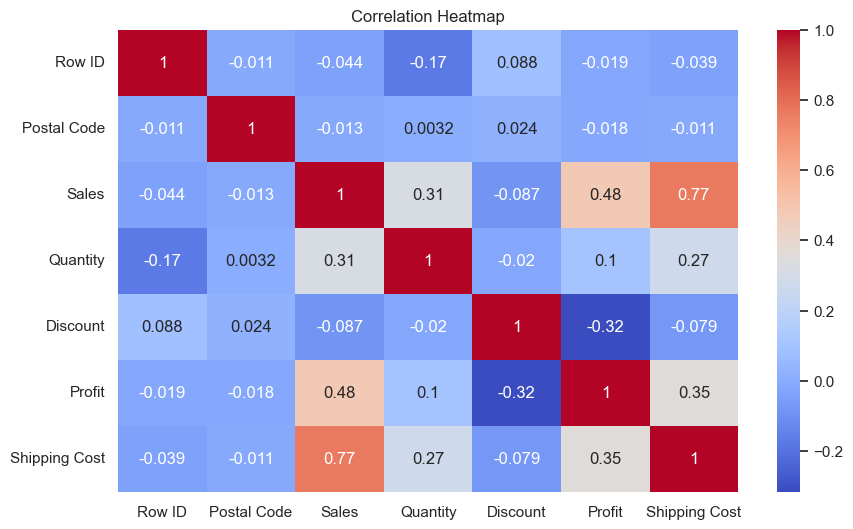

In [46]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


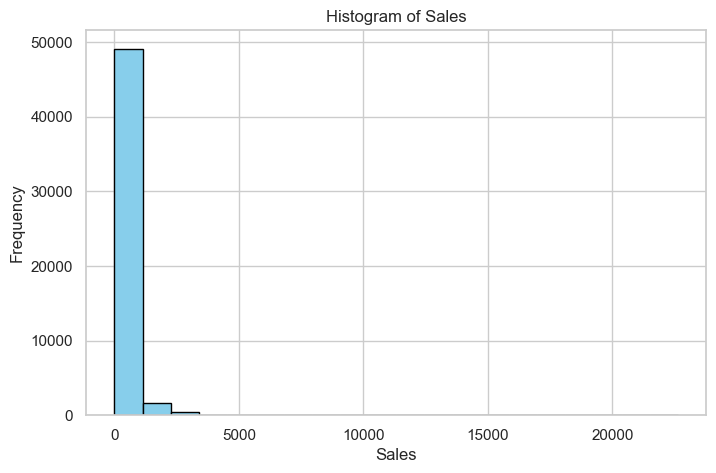

In [47]:
#Histogram of Sales
plt.figure(figsize=(8,5))
plt.hist(df['Sales'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


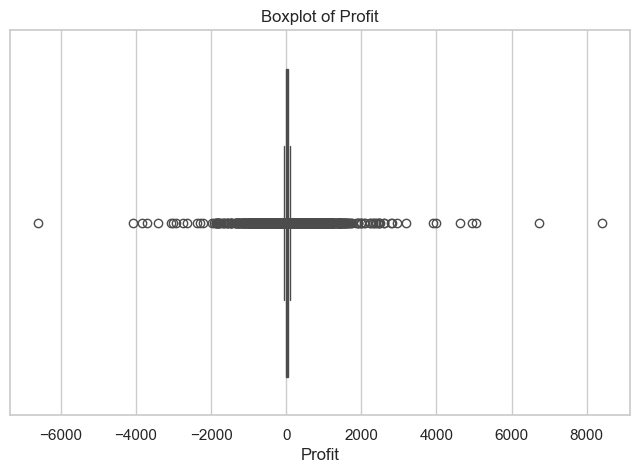

In [48]:
#Boxplot of Profit
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Profit'])
plt.title("Boxplot of Profit")
plt.show()


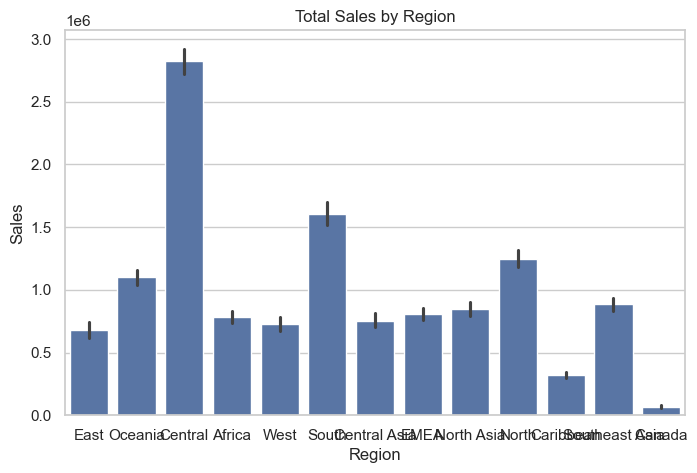

In [49]:
#Sales by Region
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum)
plt.title("Total Sales by Region")
plt.show()


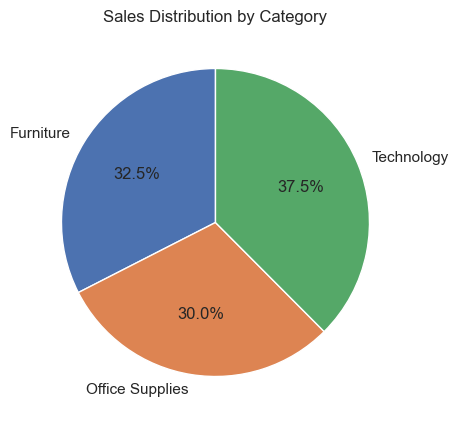

In [50]:
#Pie Chart: Sales by Category
plt.figure(figsize=(8,5))
df.groupby('Category')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title("Sales Distribution by Category")
plt.show()


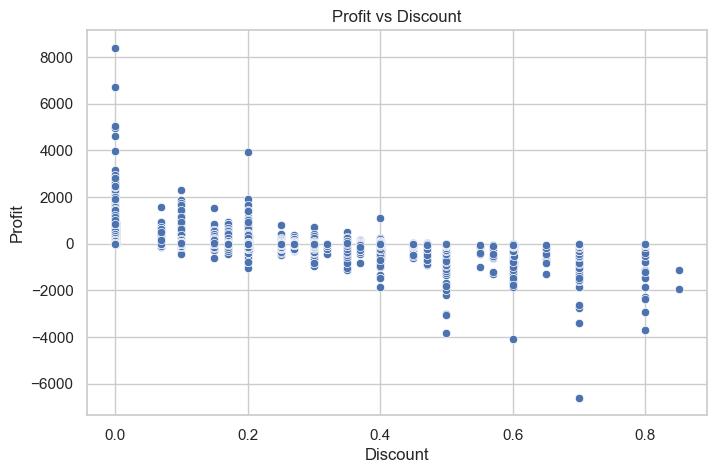

In [51]:
#Scatter Plot: Profit vs Discount
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()


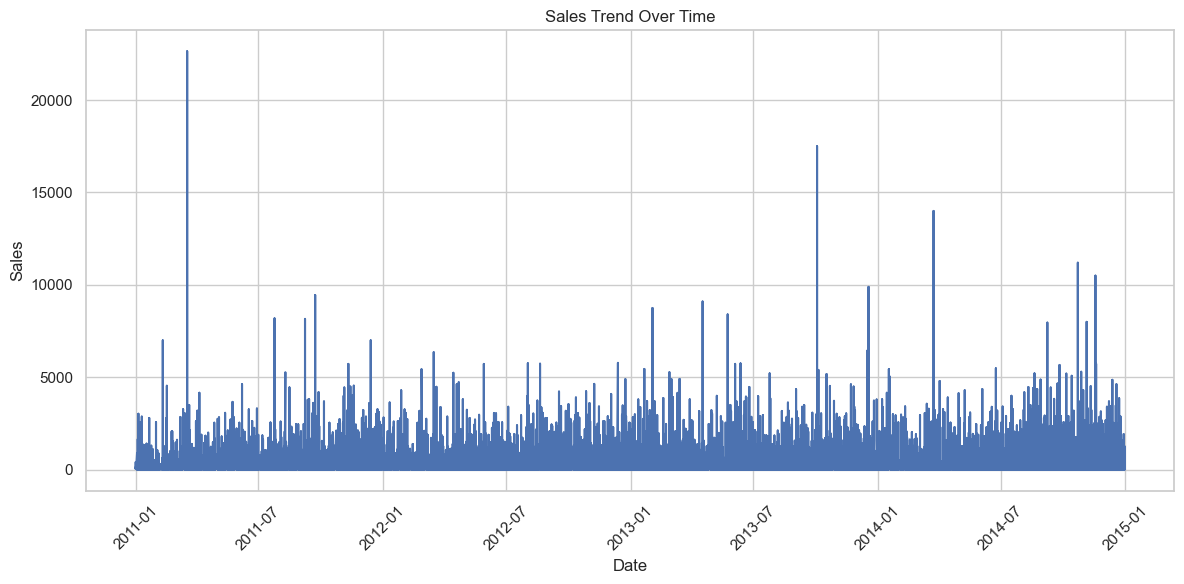

In [52]:
#Time Series Plot of Sales
df_sorted = df.sort_values('Order Date')
plt.figure(figsize=(12,6))
plt.plot(df_sorted['Order Date'], df_sorted['Sales'])
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [53]:
#Linear Regression: Predict Sales
X = df[['Profit', 'Discount']]  # Features
y = df['Sales']                # Target

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Evaluation
print("R² Score:", r2_score(y, y_pred))
print("Mean Squared Error:", mean_squared_error(y, y_pred))


R² Score: 0.24009710694322095
Mean Squared Error: 180640.5791310582


## Insights and Recommendations

Key Insights:
- Higher discounts can hurt profit but may boost sales.
- There are clear outliers in profit.
- Positive correlation exists between profit and sales.
- Certain regions and categories perform much better.

Recommendations:
- Limit discounts to optimal levels.
- Focus more on high-performing regions and product categories.
- Use regression models to simulate future pricing strategies.
